# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will be analyzing data associated with Movies. The data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
The columns 'budget', 'revenue', 'budget_adj', 'revenue_adj' has not give us the currency, let's assume
that it is in dollars. Also, We will use 'budget_adj', 'revenue_adj' instead of 'budget', 'revenue' for better understanding amounts for different years.


In this project, we will be interested in exploring the next questions: how profit depends on year of release? Also, we will analyze a runtime for different movies and explore how a runtime and a voting average depend(or not) between each other.

In [80]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# view dimensions of dataset
df.shape

(10866, 21)

As we can see, there are 10,866 movies and 21 columns.

In [4]:
# Explore summary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# Inspect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# look for instances of missing or possibly errant data.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We can see null values for imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies. The most of columns with missing values (imdb_id, homepage, tag line, overview, key words, production_companies) we already were going to delete on the next step. So, after that we will chech missing values again and delete rows with missing values.

In [8]:
# look for duplicates
sum(df.duplicated())

1

There is only one duplucate. We will delete it on the cleaning step.

Create a duplicate notebook where we will make an analysis.

In [9]:
df.to_csv('tmdb-movies_edited.csv', index = False)


## Data Cleaning

In [82]:
# Load data for editing
df_edited = pd.read_csv('tmdb-movies_edited.csv')
df_edited.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### 1. Drop duplicate

In [83]:
# Drop any duplicate rows in the dataset.
df_edited.drop_duplicates(inplace = True)

In [84]:
# check for duplicates
sum(df_edited.duplicated())

0

### 2. Drop extraneous columns

In this project, we won't be analyzing the imdb_id, popularity, release_date, homepage, production_companies, tagline, overview and  key words. So, let's delete these columns.

In [85]:
# drop extraneous columns
df_edited.drop(['id','imdb_id', 'popularity', 'homepage', 'tagline', 'vote_count', 'release_date', 'overview', 'keywords', 'production_companies'], axis = 1, inplace = True)

In [86]:
# Check deleted columns
df_edited.head(1)

,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09


### 3. Drop missing values

In [87]:
# check missing values for edited dataset
df_edited.isnull().sum()

budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

There are missing values for 'cast', 'director' and 'genres', and the columns are not numeric. Let's drop rows with any null values in the dataset.

In [88]:
# drop rows with any null values
df_edited.dropna(inplace = True)

In [91]:
# check if any of columns have null values - should print False
df_edited.isnull().sum().any()

False

In [92]:
# replace '0'  values to NaN of runtime columns
check_row = ['runtime']
df_edited[check_row] = df_edited[check_row].replace(0, np.NaN)

#drop any row which has NaN values
df_edited.dropna(subset = check_row, inplace = True)

In [93]:
# view dimensions of dataset
df_edited.shape

(10703, 11)

Now, there are 10,703 rows (movies) and 11 columns.

### 4. Change data type

In [94]:
# change data type for release_year
df_edited['release_year'].astype(int);

In [95]:
# check types one more time
df_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 11 columns):
budget            10703 non-null int64
revenue           10703 non-null int64
original_title    10703 non-null object
cast              10703 non-null object
director          10703 non-null object
runtime           10703 non-null float64
genres            10703 non-null object
vote_average      10703 non-null float64
release_year      10703 non-null int64
budget_adj        10703 non-null float64
revenue_adj       10703 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1003.4+ KB


### Research Question 1 - Year of release vs Profit 

Let's explore how profit depends on year of release. At first, calculate the sum of profits for each year:

Now, we will calculate a profit for each movie for next explore. Need to notice, that we will use determine of 'revenue_adj' and 'budget_adj'.

In [96]:
# calculate profit for each movies
# profit = revenue_adj - budget_adj
df_edited['profit'] = df_edited['revenue_adj'] - df_edited['budget_adj']
df_edited.head(1)

,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,budget_adj,revenue_adj,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [97]:
# calculate the sum of profits for each year
profit_years_sum = df_edited.groupby(['release_year'])['profit'].sum()

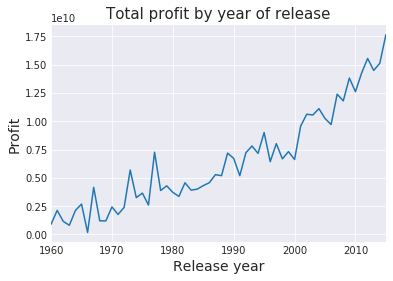

In [98]:
# plot the line years of release vs profit
sns.set_style('darkgrid')

profit_years_sum.plot(kind = 'line')
#x-axis label name
plt.xlabel('Release year', fontsize = 14)
#y-axis label name
plt.ylabel('Profit', fontsize = 14)
#title
plt.title('Total profit by year of release', fontsize=15);

In [99]:
profit_years_sum.idxmax()

2015

As we can see, graphically and by calculations year 2015 was the year where movies made the highest profit. We also can see, the trend is positive. It is possible that this may be due to an increase in the number of films released in different years. 
Let's visualize the number of films for each year.

In [70]:
# calculate the number of films for each year
profit_years_count = df_edited.groupby(['release_year'])['profit'].count()

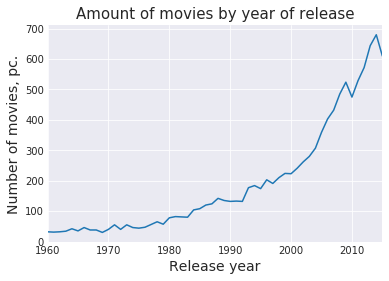

In [71]:
# plot the line years of release vs profit
sns.set_style('darkgrid')

profit_years_count.plot(kind = 'line')
#x-axis label name
plt.xlabel('Release year', fontsize = 14)
#y-axis label name
plt.ylabel('Number of movies, pc.', fontsize = 14)
#title
plt.title('Amount of movies by year of release', fontsize=15);

Now we can see, the number of movies is continuously increasing. So, we can say that the sum of profit for a year can depend on the number of movies too, not only on the success of films.

Let's visualise the mean profit for each year for better understanding our data.

In [72]:
# calculate the number of films for each year
profit_years_mean = df_edited.groupby(['release_year'])['profit'].mean()

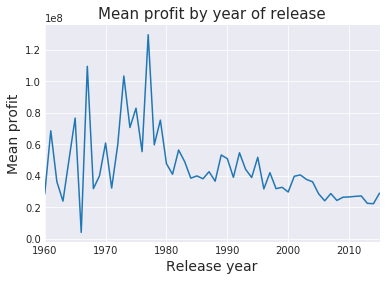

In [73]:
# plot the line years of release vs profit
sns.set_style('darkgrid')

profit_years_mean.plot(kind = 'line')
#x-axis label name
plt.xlabel('Release year', fontsize = 14)
#y-axis label name
plt.ylabel('Mean profit', fontsize = 14)
#title
plt.title('Mean profit by year of release', fontsize=15);

In [74]:
profit_years_mean.idxmax()

1977

Now we can conclude that the maximal mean profit in 1977. We also can see that the trend of mean profit is decreasing. 

### Research Question 2 - the average runtime.

Now, we will analyze a runtime for different movies, find the mean and longest movie. We also explore how a runtime and a voting average depend between each other.

In [75]:
# find mean runtime
df_edited['runtime'].mean()

102.73689619732785

In [76]:
# find film with max runtime
max_id = df_edited['runtime'].idxmax()
pd.DataFrame(df_edited.loc[max_id])

,3894
id,125336
budget,0
revenue,0
original_title,The Story of Film: An Odyssey
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
director,Mark Cousins
runtime,900
genres,Documentary
vote_count,14
vote_average,9.2


We see that the longest moview in our data is 'The Story of Film: An Odyssey'. The runtime of the film is 900 minutes. In this way, it's nine times more than mean runtime.

We will plotting a histogram of the runtime of movies:

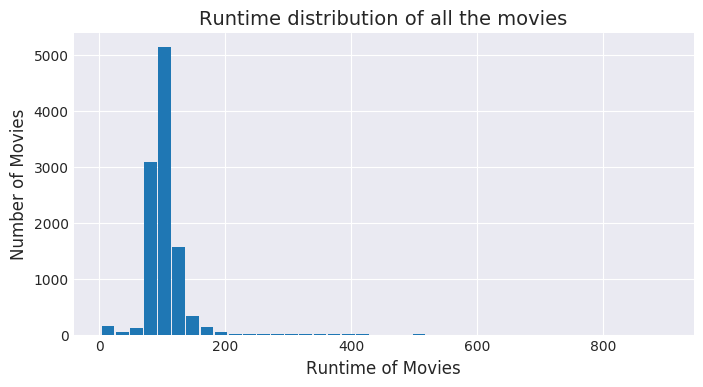

In [77]:
#plotting a histogram of runtime of movies
sns.set_style('darkgrid')
#figure size
plt.figure(figsize=(8,4), dpi = 100)
#x-axis label name
plt.xlabel('Runtime of Movies', fontsize = 12)
#y-axis label name
plt.ylabel('Number of Movies', fontsize=12)
#title of the graph
plt.title('Runtime distribution of all the movies', fontsize=14)

plt.hist(df_edited['runtime'], rwidth = 0.9, bins =40);

As we can see, the most frequent runtime for our data is 90-115 minutes. The number of movies with the runtime is about 5100.

Now let's try to analyze what length of movies most liked by the audiences according to vote_average?

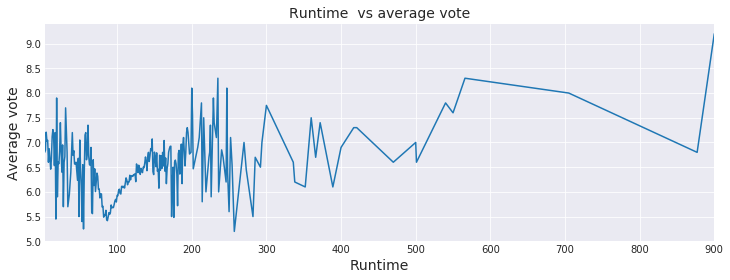

In [79]:
popularity_mean = df_edited.groupby('runtime')['vote_average'].mean()
#figure size
plt.figure(figsize=(12,4))

popularity_mean.plot(kind = 'line')
#x-axis label name
plt.xlabel('Runtime',fontsize = 14)
#y-axis label name
plt.ylabel('Average vote',fontsize = 14)
#title of the graph
plt.title('Runtime  vs average vote', fontsize=14);

We can see movies with a runtime longer than 300 minutes don't have average vote less than 6.0. In the same time, there a lot of high and low votes for movies with different runtime. We can conclude that for our data there are not any depending between a runtime and a voting average. 

<a id='conclusions'></a>
## Conclusions

In this project, we have analyzed information about 10,000 movies collected from The Movie Database (TMDb). On the first step, we analyzed how profit depends on the year of release. We found out that the total profit of the movies for each year was increasing. And 2015 was the year where movies made the highest profit. We made a guess that this may be due to an increase in the number of films released in different years. And we found out that it is true, the number of movies was increasing continuously from 1960 to 2015. We made a conclusion that the total of profit for a year can depend on the number of movies too, not only on the success of films. On the final step for this question, we calculated a mean profit for each year and made a conclusion that the maximal mean profit was in 1977. We also can see that the trend of mean profit is decreasing.

At the next part, we analyzed a runtime for different movies. We found that the mean run time is about 90 - 115 minutes and that the longest movie is 'The Story of Film: An Odyssey' - 900 minutes. We also explore how a runtime and a voting average depend between each other.  We found that movies with a runtime longer than 300 minutes did not have average vote less than 6.0. In the same time, we can see a lot of high and low votes for movies with different runtime. We could conclude that for our data there are not any depending between a runtime and a voting average.

In [100]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0